# Fashion Mnist

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Improt TensorFlow Library, pandas and matplotlib


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(len(train_images), len(test_images))
train_images = train_images/255
test_images = test_images/255

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


Import fashion mnist data and seperate it into training and testing datsets
dividing each pixel by 255 since it's gray sacle and diving it by 255 means reducing the size to the range of 0-1

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='sgd', metrics='accuracy')

Create layers for the model and compiling it

In [4]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images,test_labels))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7702 - val_loss: 0.5513 - val_accuracy: 0.8075
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4797 - accuracy: 0.8318 - val_loss: 0.4768 - val_accuracy: 0.8337
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4349 - accuracy: 0.8464 - val_loss: 0.4667 - val_accuracy: 0.8391
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4067 - accuracy: 0.8579 - val_loss: 0.4397 - val_accuracy: 0.8438
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3880 - accuracy: 0.8639 - val_loss: 0.4233 - val_accuracy: 0.8479
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3724 - accuracy: 0.8680 - val_loss: 0.4110 - val_accuracy: 0.8539
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.8720 - val_loss: 0.3936 - val_accuracy:

Training the Model with validation data


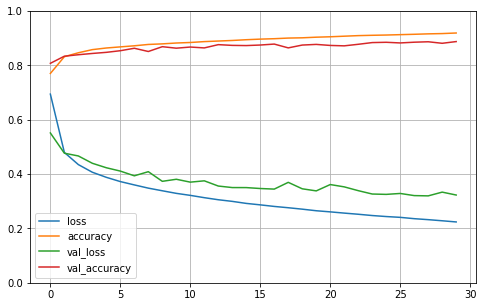

313/313 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8875


[0.32293087244033813, 0.887499988079071]

In [5]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(test_images, test_labels)

Plotting The data with loss, accuracy, val_loss and val_accuracy

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]
testing = test_images[:3]
prediction = model.predict_classes(testing)
prediction.round(2)
np.array(class_names)[prediction]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Predicting the data with model